# Importing libraries and reading dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv('Telco_Customer_Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploring unique values for each columns

In [4]:
for column in df.columns:
    print('{} : {}'.format(column,df[column].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

# Exploratory Data Analysis and Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values on the data set. However,TotalCharges column is wrongly labeled as object. So, pd.to_numeric function can be used to transforming it to numeric data type.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

Removing CustomID column as it unusful for model training

In [7]:
df.drop('customerID',axis=1,inplace=True)

Checking duplicate values

In [8]:
df.duplicated().sum()

22

There are 22 rows of duplicate values. So, lets drop duplicate values from dataset.

In [9]:
df.drop_duplicates(inplace=True)

Exploring total null values after conversion and duplicate removal.

In [10]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Droping null values from dataframe.

In [11]:
df.dropna(inplace=True)

Some payment method contain parenthesis and word automatic after method type description. So lets explore and remove them.

In [12]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [14]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


# Churn Analysis and Data Visualization

Count Plot to dipict distribution of customer churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

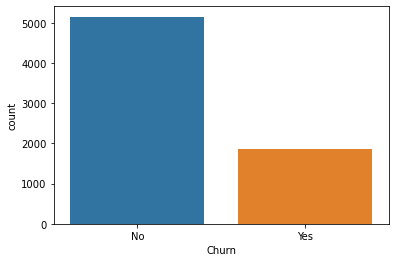

In [16]:
sns.countplot(data=df,x='Churn')

In [17]:
df['Churn'].value_counts()

No     5153
Yes    1857
Name: Churn, dtype: int64

There are 'no' customer churn for majority(5153) telco customer.It should be taken into account that this imbalance will lead to larger false negative when modeling in later stage.

Using boxplot to explore distribution for 'No' and 'Yes' customer churn with respect to 'TotalCharges'.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

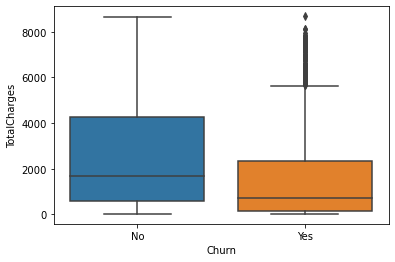

In [18]:
sns.boxplot(data=df,x='Churn',y='TotalCharges')

Exploring Churn for diffrent contract type and their distribution with TotalCharges.

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

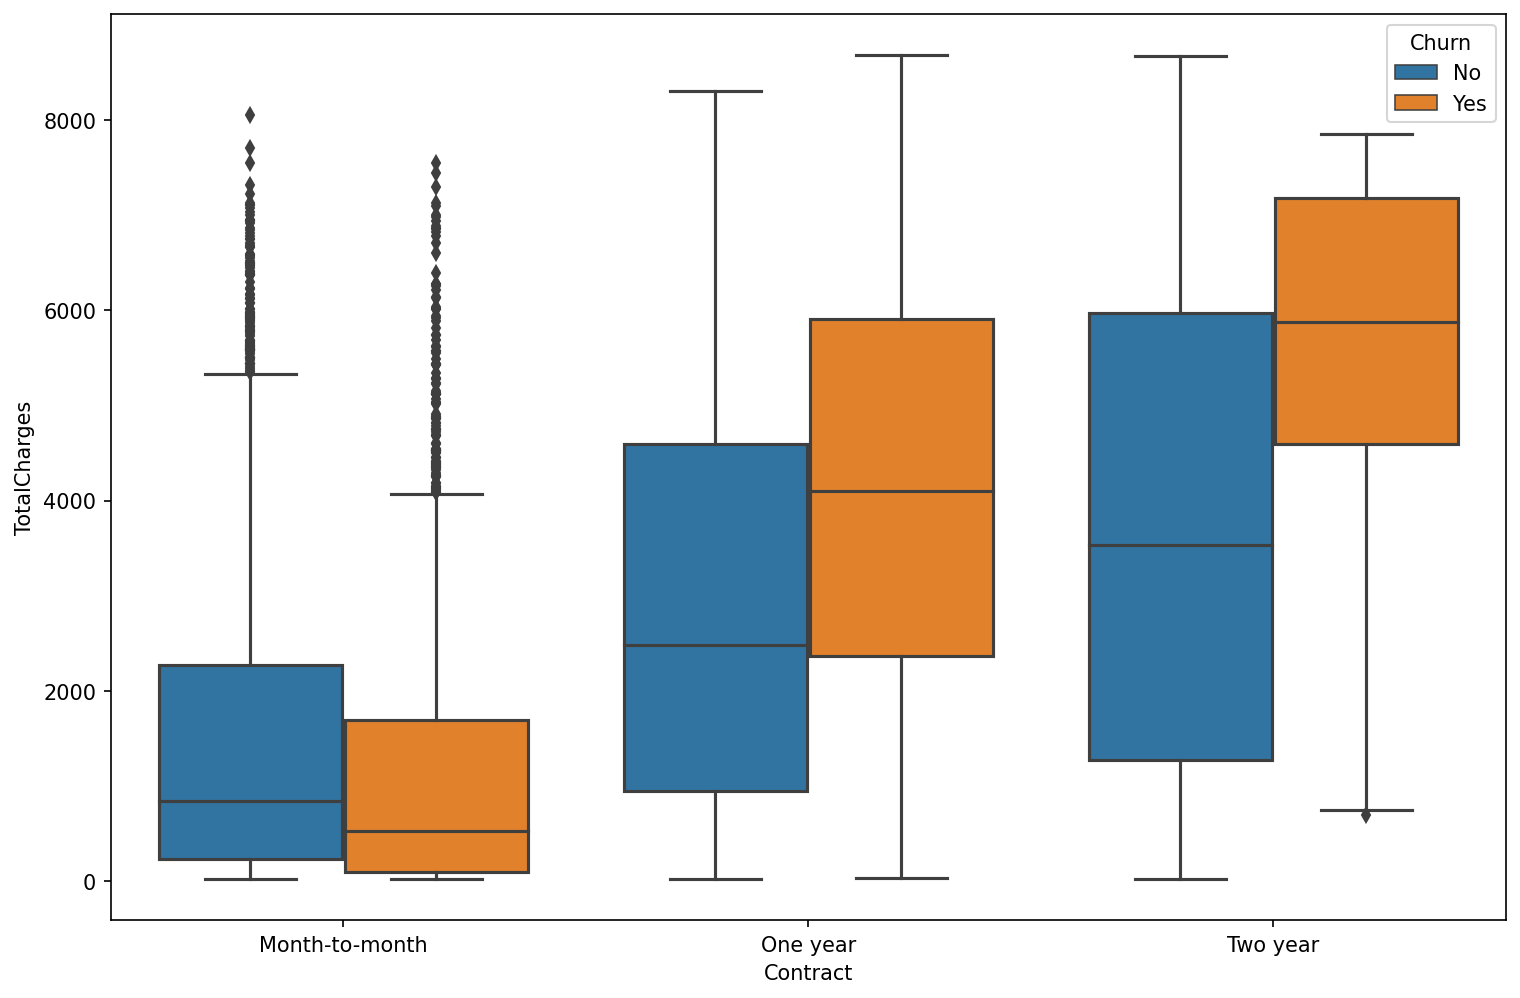

In [19]:
plt.figure(figsize=(12,8),dpi = 150)
sns.boxplot(data=df,y='TotalCharges',x='Contract', hue='Churn')

Month-to-month contract charges less and has high churn followed by one year contract. Two year contract has low churn rate and incur more total charges.

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Performing corelation analysis for features by converting them to dummy variables.

In [21]:
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']]).corr()

In [22]:
corr_y_Churn=corr_df['Churn_Yes'].sort_values().iloc[1:-1]
corr_y_Churn

tenure                                 -0.353339
Contract_Two year                      -0.301375
InternetService_No                     -0.228220
StreamingTV_No internet service        -0.228220
TechSupport_No internet service        -0.228220
DeviceProtection_No internet service   -0.228220
OnlineBackup_No internet service       -0.228220
OnlineSecurity_No internet service     -0.228220
StreamingMovies_No internet service    -0.228220
TotalCharges                           -0.198362
PaperlessBilling_No                    -0.190518
Contract_One year                      -0.177742
OnlineSecurity_Yes                     -0.170565
TechSupport_Yes                        -0.163980
Dependents_Yes                         -0.162366
Partner_Yes                            -0.148670
PaymentMethod_Credit card              -0.134052
InternetService_DSL                    -0.124152
PaymentMethod_Bank transfer            -0.117442
PaymentMethod_Mailed check             -0.091649
OnlineBackup_Yes    

Ploting feature corelation with respect to Yes Churn.

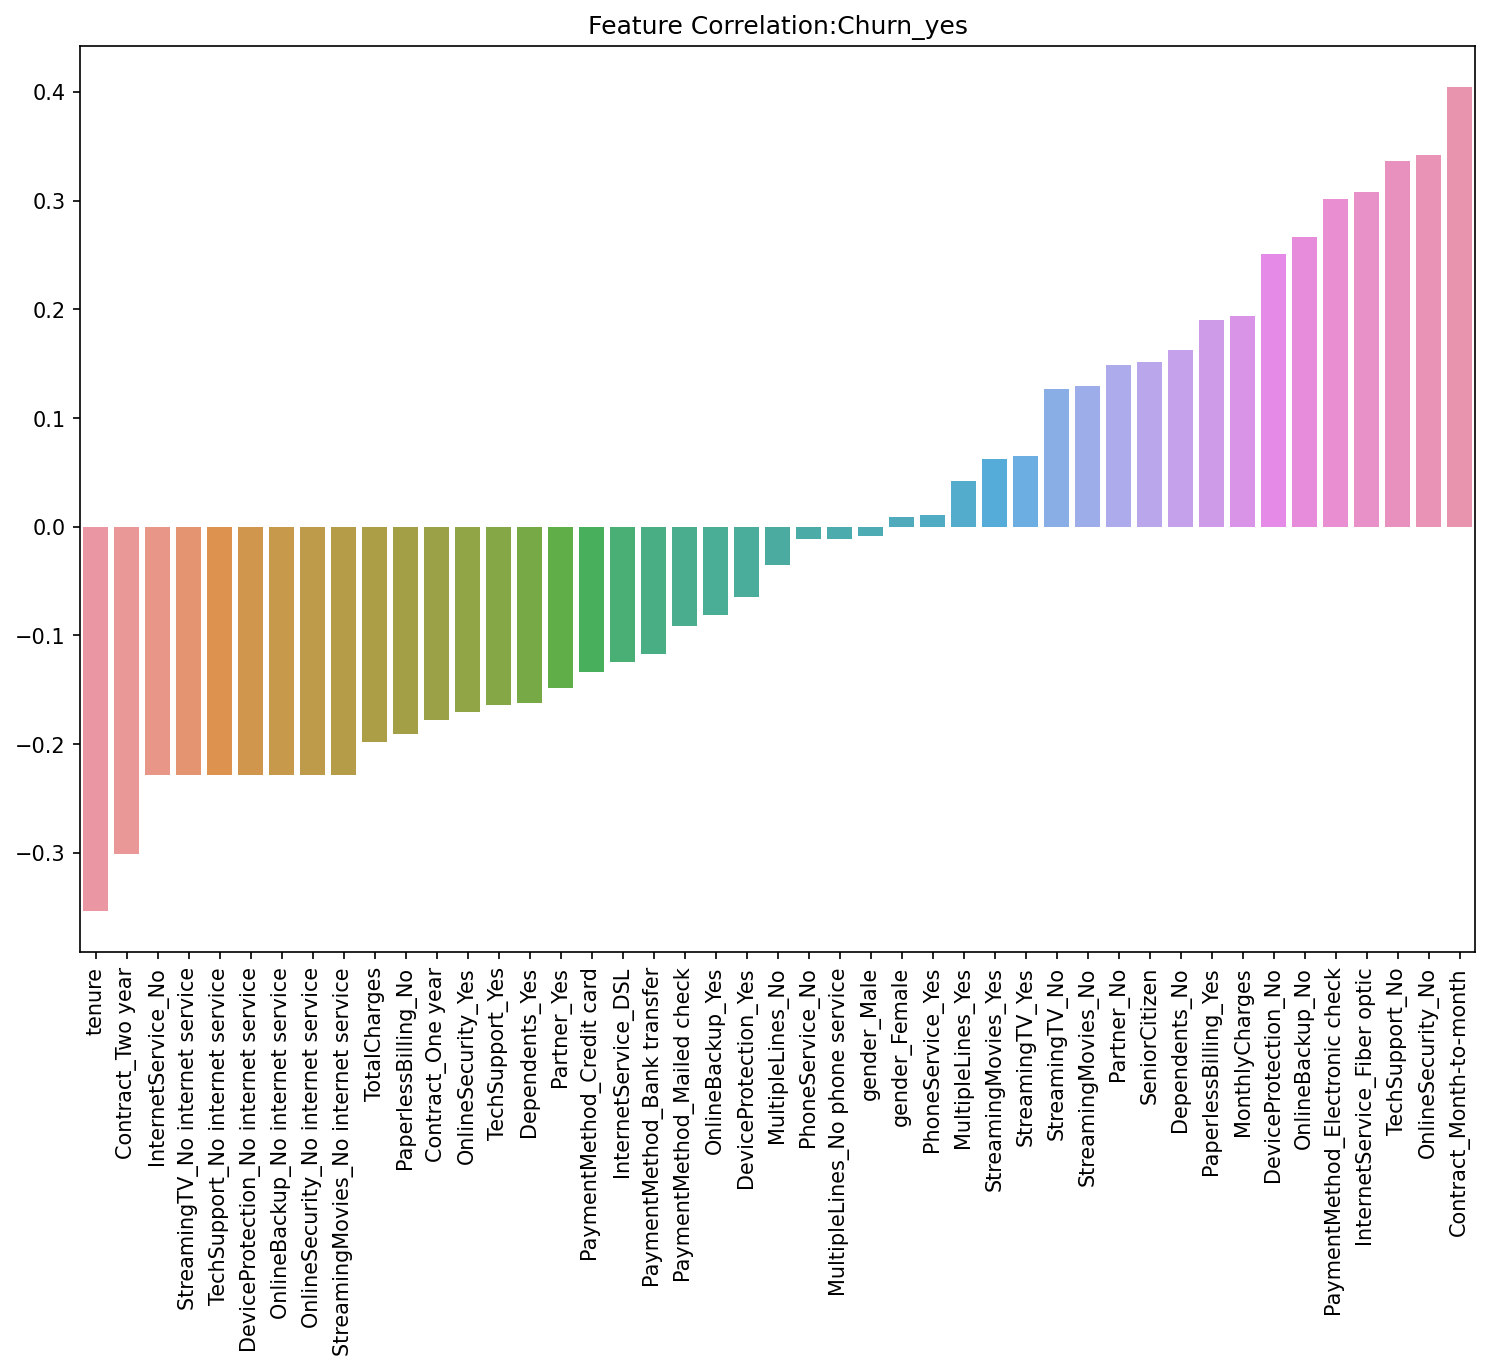

In [23]:
plt.figure(figsize=(12,8),dpi = 150)
plt.title('Feature Correlation:Churn_yes')
sns.barplot(x=corr_y_Churn.index,y=corr_y_Churn.values)
plt.xticks(rotation=90);

Tenure and two year contract has highest negative corelation and month to month contract has highest positive corelation. So lets explore further into contract and tenure.

In [24]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Histogram displaying distribution of 'tenure' column

<AxesSubplot:xlabel='tenure', ylabel='Count'>

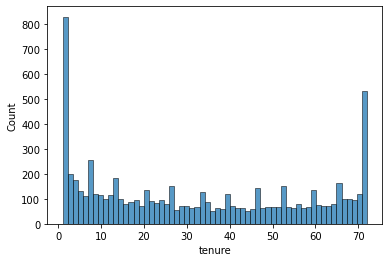

In [25]:
sns.histplot(data=df,x='tenure', bins=60)

Histogram showing churn and diffrent contract types.

<Figure size 4000x2000 with 0 Axes>

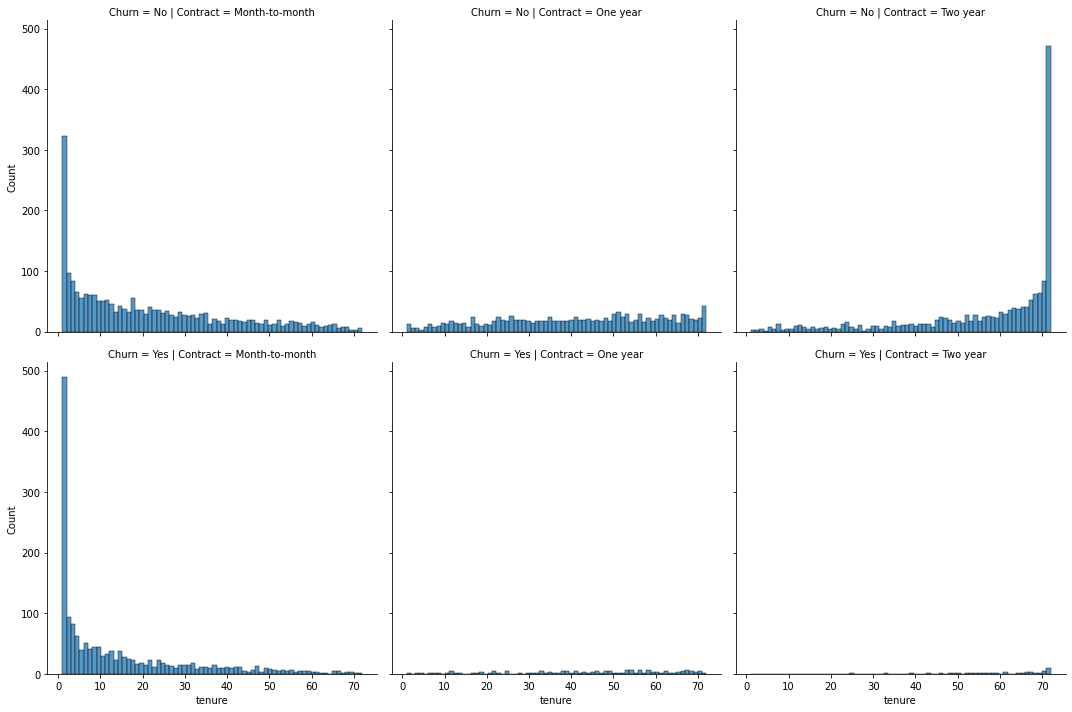

In [26]:
plt.figure(figsize=(16,8),dpi=250)
sns.displot(data=df, x='tenure',bins=70,col='Contract',row='Churn');

Above histogram displays that there are less customer churn for longer tenure compared to month-to-month plan.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

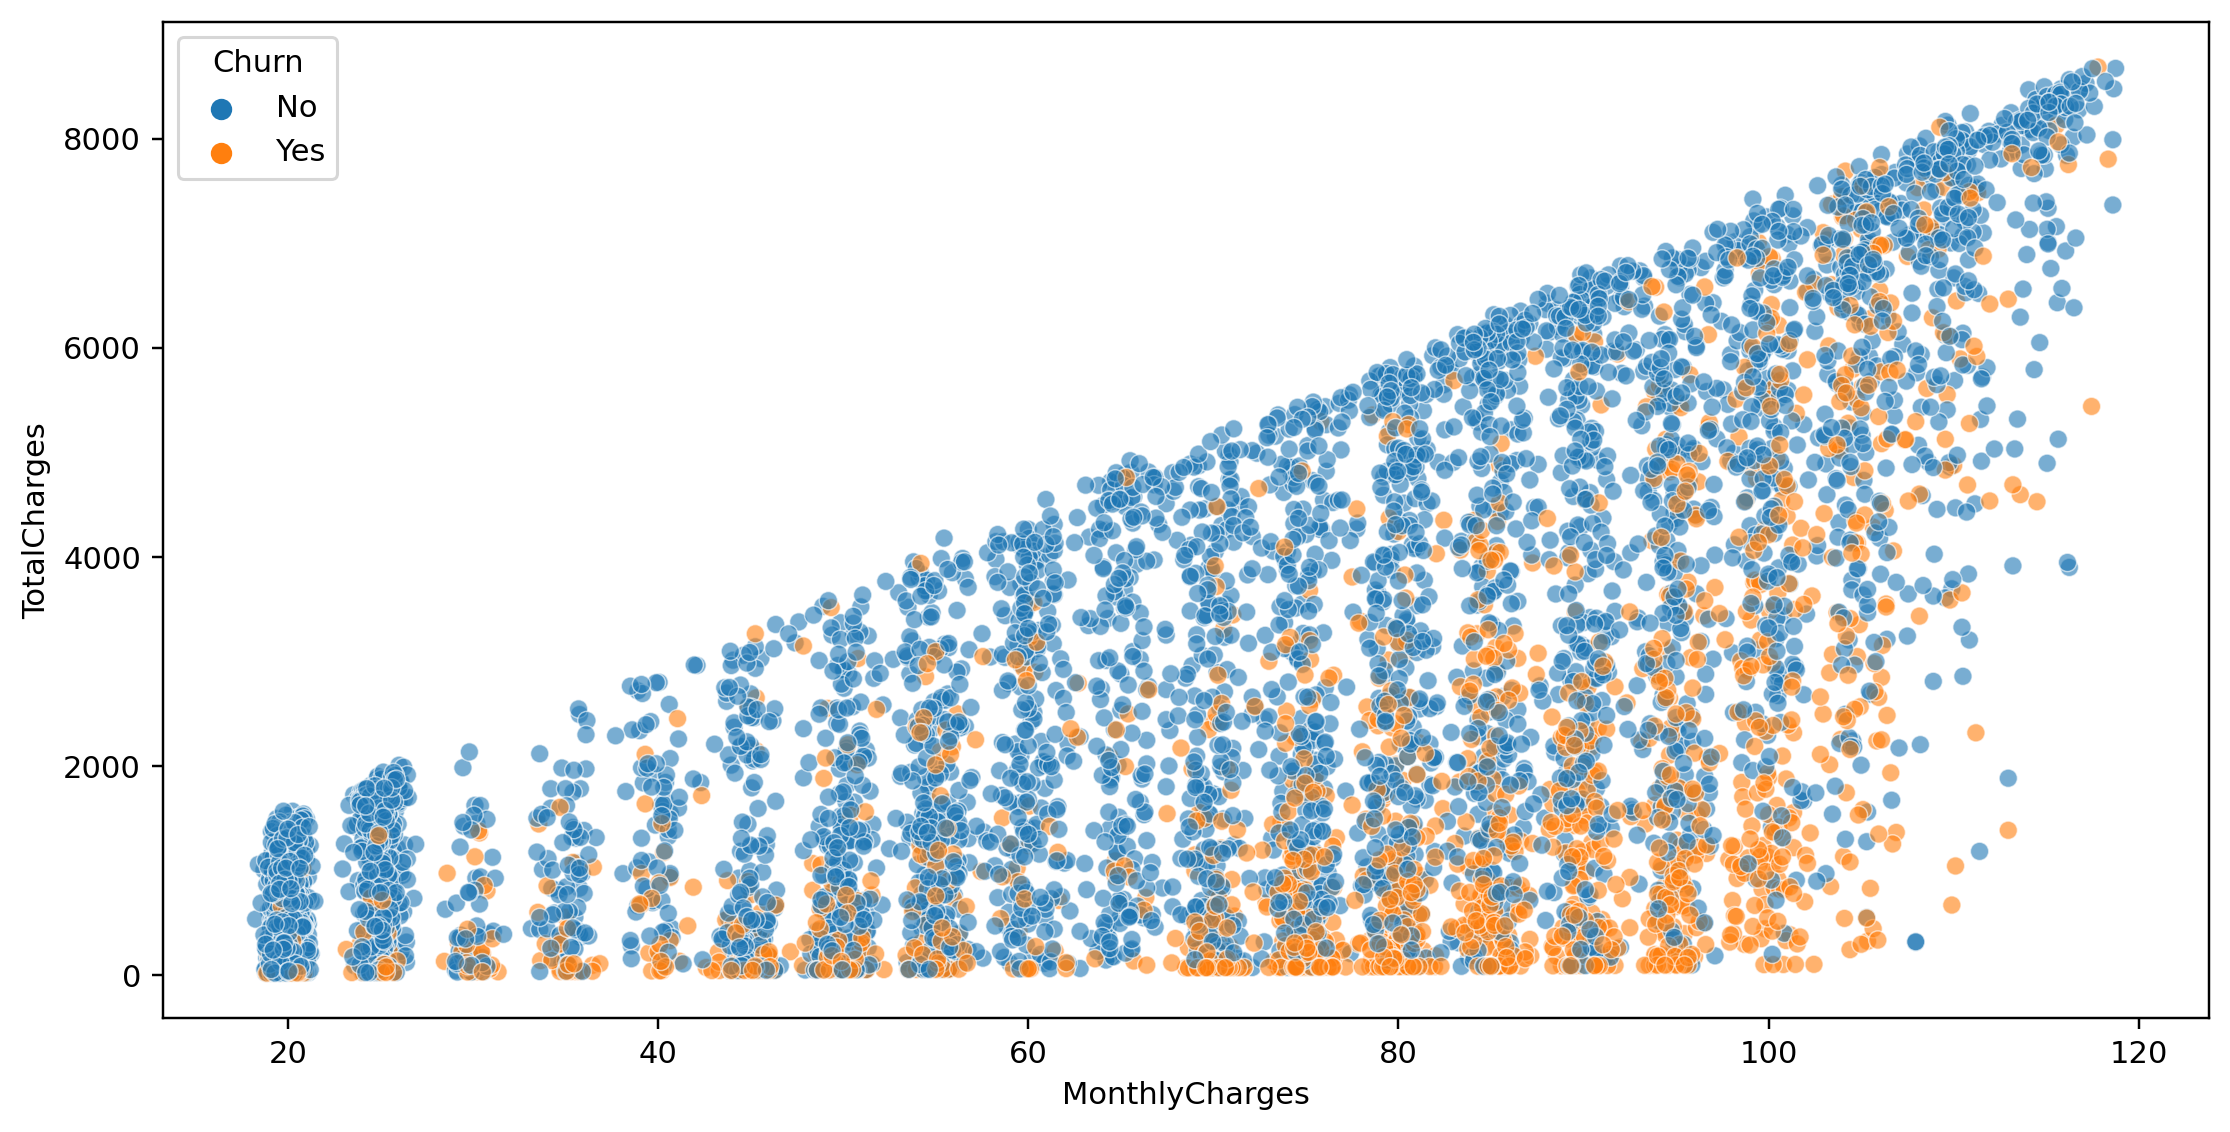

In [27]:
plt.figure(figsize=(12,6),dpi = 220)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.6)

From the scaterplot we can observe that for high monthly charge there are higher churn rate.

Using normalization to rescale features to a fixed range of 0 and 1 for 'tenure', 'MonthlyCharges' and 'TotalCharges' columns.

In [28]:
norm_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in norm_col:
    min_col = df[column].min()
    max_col = df[column].max()
    df[column] = (df[column] - min_col)/(max_col - min_col)

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,Male,0,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,Male,0,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,Male,0,No,No,0.619718,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,0.239303,0.210241,No
4,Female,0,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


# Prediction Model

Assigning X,y and splitting data to training and testing sets.

In [30]:
X = df.drop(['Churn'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']
print(X.columns)
print(y.name)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check'],
      dtype='object')
Churn


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40,shuffle=True)

Exploring and assessing multiple algorithms such as K-nearest neighbors, logistic regression, support vector, random forest,adaboost and gradient boosting for model.

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
def create_models():
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('Logistic_Regression', LogisticRegression()))
    models.append(('Support_Vector_Machines', SVC()))
    models.append(('Random_Forest', RandomForestClassifier()))
    models.append(('Ada_Boost', AdaBoostClassifier()))
    models.append(('Gradient_Boosting', GradientBoostingClassifier()))
    
    return models

models = create_models()

In [35]:
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train).predict(X_test)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append(accuracy)
    names.append(name)
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: KNN, Accuracy: 0.7709125475285171)
Classifier: Logistic_Regression, Accuracy: 0.8136882129277566)
Classifier: Support_Vector_Machines, Accuracy: 0.8222433460076045)
Classifier: Random_Forest, Accuracy: 0.80893536121673)
Classifier: Ada_Boost, Accuracy: 0.811787072243346)
Classifier: Gradient_Boosting, Accuracy: 0.80893536121673)


Logistic regression, support vector machines, Ada boost classifier and gradient boosting have good accuracy of 81 percentages. However, AdaBoost has slightly higher accuracy, hence AdaBoost is selected.

Now lets do hyperparameter tuning for our model using GridSearchCV.

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {"n_estimators": [40,60,101,200], 'learning_rate': [0.001,0.01,0.2,0.5]}

In [73]:
ada_model = AdaBoostClassifier()

In [74]:
grid = GridSearchCV(ada_model,param_grid)

In [75]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.2, 0.5],
                         'n_estimators': [40, 60, 101, 200]})

In [76]:
grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 101}

Best parameters of learning rate 0.5 and n_estimatos 101 is extracted after fitting model.

Performance evaluation of model is done next using confusion matrix and classification report.

In [77]:
predictions = grid.predict(X_test)

In [85]:
confusion_matrix(y_test,predictions)

array([[702,  80],
       [120, 150]])

As shown in above confusion matrix, 852 observation of test data were correctly classified out of which 702 were true negative and 150 were true positive. Further there were 200 misclassification with 120 false negative and 80 false positive.

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.85      0.90      0.88       782
         Yes       0.65      0.56      0.60       270

    accuracy                           0.81      1052
   macro avg       0.75      0.73      0.74      1052
weighted avg       0.80      0.81      0.80      1052



We obtained 56 percent sensitivity, 85 percent precision for 'no' and 65 percent precision for 'yes' class. The accuracy_score of model is 80 percent. As we can observe hyper parameter tuning didnot improve accuracy of our model.

In [88]:
from sklearn.metrics import plot_confusion_matrix

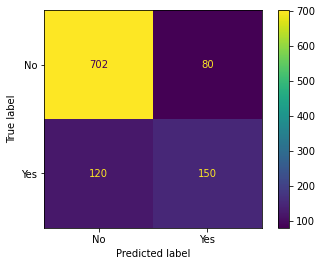

In [89]:
plot_confusion_matrix(grid,X_test,y_test)